# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
df = pd.read_csv("dataset_bank.csv")

In [4]:
df.head(5)

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [6]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [7]:
# Memilih kolom numerik
numerical_cols = df.select_dtypes(include=['number']).columns

In [8]:
# Hitung matriks korelasi
correlation = df[numerical_cols].corr()

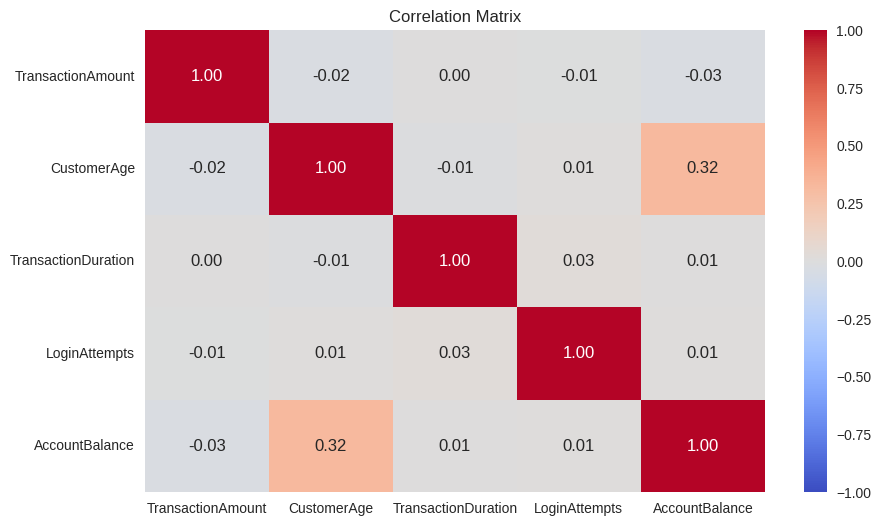

In [9]:
# Buat visualisasi heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation,
               annot=True,
               cmap='coolwarm',
               fmt=".2f",
               vmin=-1,
vmax=1)
plt.title('Correlation Matrix')
plt.show()

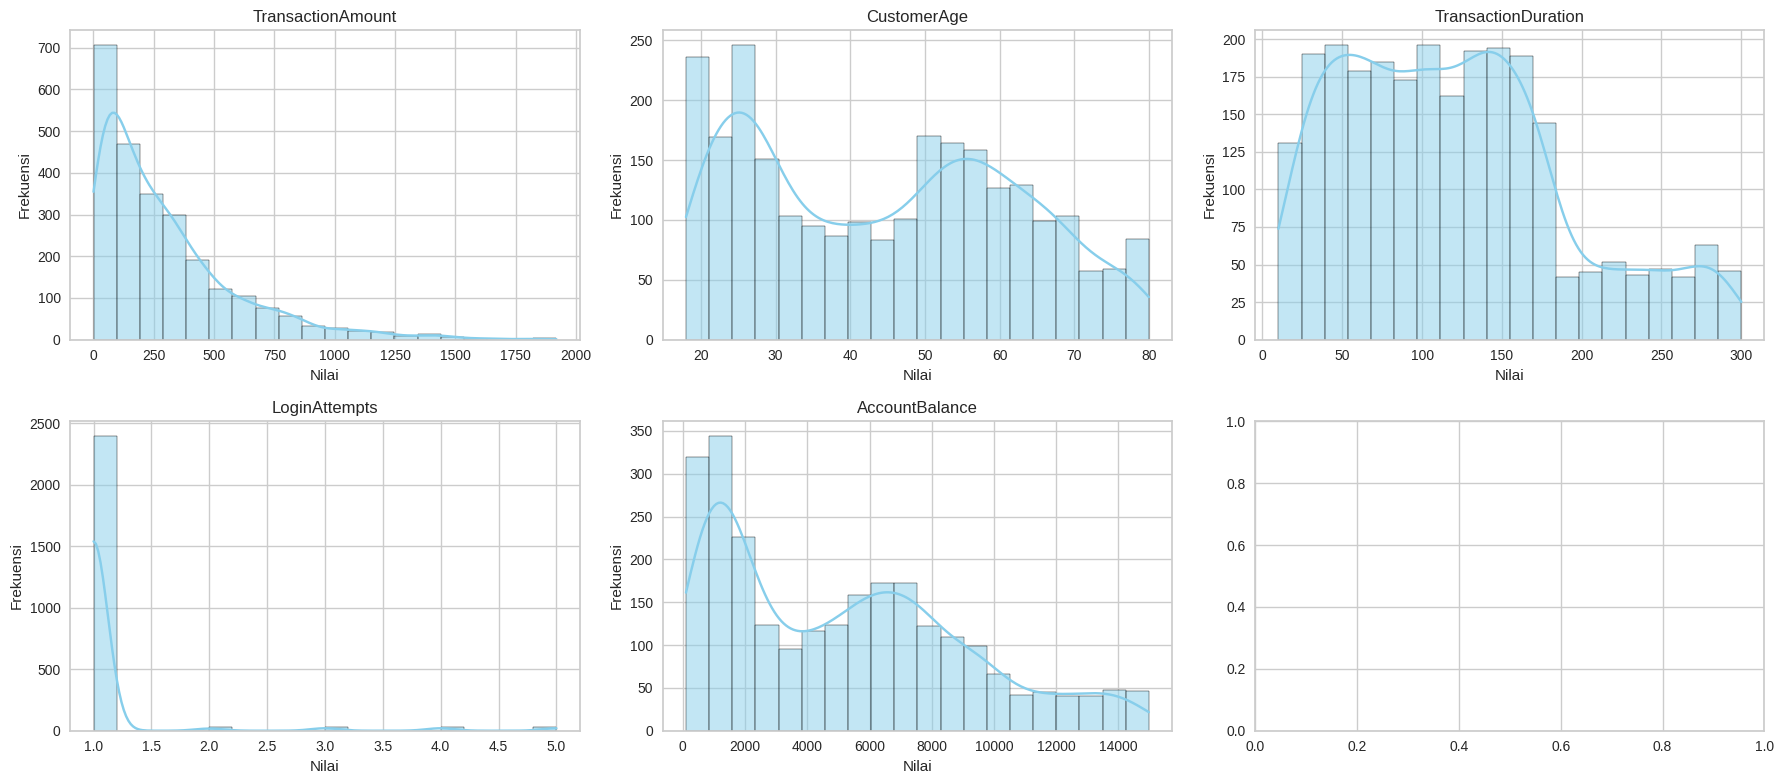

In [12]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

for i, column in enumerate(numerical_cols):
  sns.histplot(df[column], bins=20, kde=True, color='skyblue', ax=axes[i])
  axes[i].set_title(column)
  axes[i].set_xlabel("Nilai")
  axes[i].set_ylabel("Frekuensi")
plt.tight_layout()
plt.show()

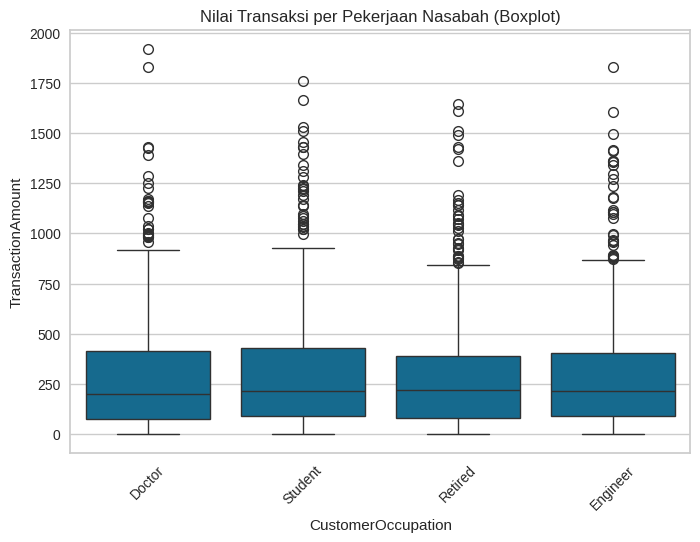

In [13]:
# Visualisasi yang lebih informatif
sns.boxplot(x='CustomerOccupation', y='TransactionAmount', data=df)

plt.title("Nilai Transaksi per Pekerjaan Nasabah (Boxplot)")

plt.xticks(rotation=45)

plt.show()


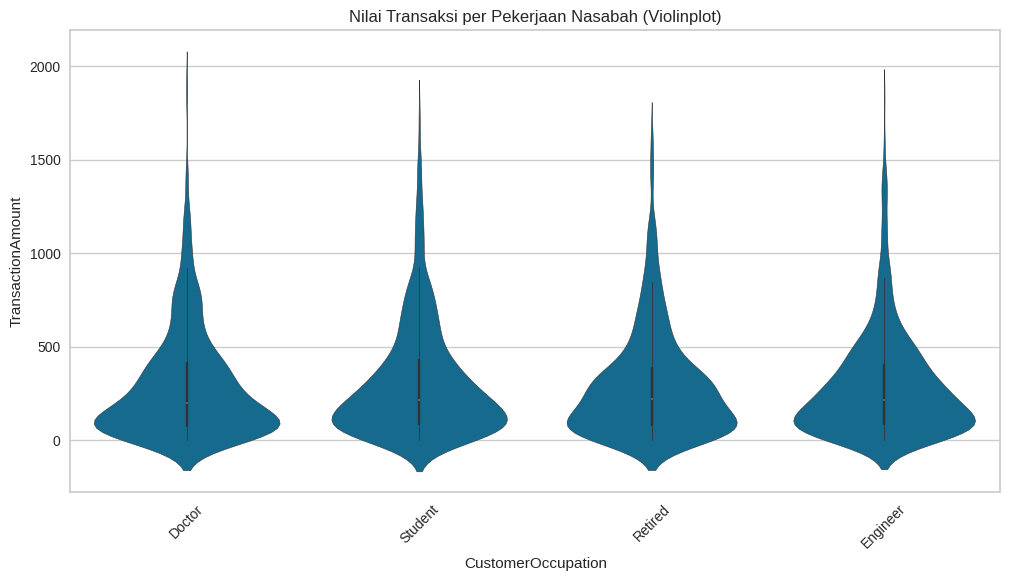

In [14]:
# violinplot' (sns.violinplot)
plt.figure(figsize=(12, 6))
sns.violinplot(x='CustomerOccupation', y='TransactionAmount', data=df)
plt.title("Nilai Transaksi per Pekerjaan Nasabah (Violinplot)")
plt.xticks(rotation=45)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [15]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [17]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [18]:
# Menangani data yang hilang.
# Panggil fungsi untuk menghapus baris yang hilang dan pastikan agar perubahan disimpan kembali ke 'df'
df.dropna(inplace=True)

In [19]:
# Cek kembali dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
PreviousTransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [20]:
# Menghapus data duplikat.
df.drop_duplicates(inplace=True)

In [21]:
# Cek kembali dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(0)

In [22]:
# Melakukan drop pada kolom yang memiliki keterangan Date, id, dan IP Address
cols_to_drop = [col for col in df.columns if
                'id' in col.lower() or
                'ip' in col.lower() or
                'date' in col.lower()]

In [23]:
df = df.drop(columns=cols_to_drop)

In [24]:
# Menampilkan 5 baris pertama untuk memverifikasi
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68


In [25]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
categorical_cols = list(df.select_dtypes(include=['object']).columns)

encoders = {}

# Loop melalui setiap kolom kategorikal
for column in categorical_cols:
    # Buat (instantiate) objek LabelEncoder
    label_encoder = LabelEncoder()

    # Terapkan (fit) encoder ke data dan sekaligus ubah (transform) data tersebut
    df[column] = label_encoder.fit_transform(df[column])

    # Simpan encoder
    encoders[column] = label_encoder

In [26]:
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06
5,92.15,1,28,0,18.0,3,172.0,1.0,781.68


In [27]:
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

In [28]:
# Melakukan Handling Outlier Data menggunakan metode drop.
for col in numerical_cols:

    # Hitung Kuartil 1 (Q1) dan Kuartil 3 (Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Hitung Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Tentukan batas bawah (lower bound) dan batas atas (upper bound)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter DataFrame: Simpan hanya baris di mana nilai 'df[col]' berada DI ANTARA (inklusif) batas bawah dan batas atas.
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [29]:
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.0,1945.000000
mean,256.838278,0.771722,21.299743,0.977378,44.693059,1.503342,119.225193,1.0,5100.811913
std,218.370197,0.419830,12.329250,0.804119,17.743453,1.135888,70.600647,0.0,3907.153333
min,0.260000,0.000000,0.000000,0.000000,18.000000,0.000000,10.000000,1.0,102.200000
25%,78.920000,1.000000,11.000000,0.000000,27.000000,0.000000,63.000000,1.0,1488.650000
50%,199.700000,1.000000,21.000000,1.000000,45.000000,1.000000,111.000000,1.0,4693.600000
75%,374.500000,1.000000,32.000000,2.000000,59.000000,3.000000,162.000000,1.0,7659.990000
max,903.190000,1.000000,42.000000,2.000000,80.000000,3.000000,300.000000,1.0,14977.990000


In [30]:
# Buat (instantiate) StandardScaler
scaler = StandardScaler()

# Menerapkan (fit) scaler ke data dan sekaligus ubah (transform) data tersebut
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Menampilkan 5 baris pertama untuk memverifikasi hasil scaling
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-1.111922,1,36,0,1.426636,0,-0.541568,0.0,0.002918
1,0.546926,1,15,0,1.313889,0,0.308502,0.0,2.216531
2,-0.597984,1,23,2,-1.448403,3,-0.895763,0.0,-1.018513
3,-0.331350,1,33,2,-1.053790,3,-1.334965,0.0,0.887895
5,-0.754364,1,28,0,-1.504776,3,0.747704,0.0,-1.105726


In [31]:
 # Melakukan binning data
col_to_bin = 'CustomerAge'  # (Isi dengan 'CustomerAge' atau kolom numerik lain)

new_col_name = 'CustomerAge_Bin'

# Mulai dari rendah --> sedang --> tinggi
bin_labels = ['Young', 'Middle-aged', 'Senior']

df[new_col_name] = pd.qcut(df[col_to_bin], q=3, labels=bin_labels, duplicates='drop')

# Lakukan Label Encoding pada kolom baru ini agar menjadi numerik
label_encoder = LabelEncoder()
df[new_col_name] = label_encoder.fit_transform(df[new_col_name])

# Simpan encoder dan tambahkan nama kolom baru ke 'categorical_cols'
encoders[new_col_name] = label_encoder
categorical_cols.extend([new_col_name])

# Tampilkan 5 baris pertama untuk memverifikasi
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_Bin
0,-1.111922,1,36,0,1.426636,0,-0.541568,0.0,0.002918,1
1,0.546926,1,15,0,1.313889,0,0.308502,0.0,2.216531,1
2,-0.597984,1,23,2,-1.448403,3,-0.895763,0.0,-1.018513,2
3,-0.331350,1,33,2,-1.053790,3,-1.334965,0.0,0.887895,2
5,-0.754364,1,28,0,-1.504776,3,0.747704,0.0,-1.105726,2


In [32]:
#Menyimpan Hasil Pre-processing
df.to_csv('preprocessed_data.csv', index=False)
print('Data preprocessing telah berhasil disimpan ke preprocessed_data.csv')

Data preprocessing telah berhasil disimpan ke preprocessed_data.csv
